In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists, basename

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')


Downloaded az-paper-twocol.mplstyle


[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]


<ErrorbarContainer object of 3 artists>

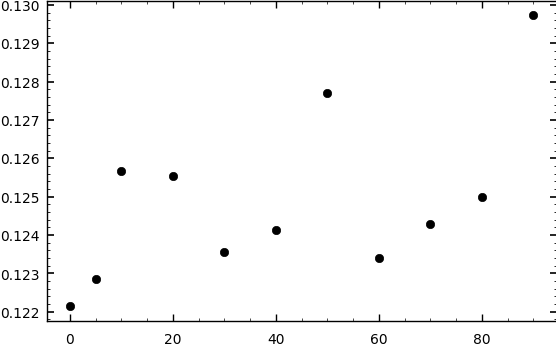

In [69]:
plist=[0,5,10,20,30,40,50,60,70,80,90]

allrocauc=np.zeros((4,len(plist)))

for k in range(1,2):
    rocauc=np.array([])
    for i in range(0,len(plist)):
        res=pd.read_csv('results\\'+str(plist[i])+'_'+str(k)+'.csv')
        rocauc=np.append(rocauc,res['ROC AUC'])
    allrocauc[k-1]=rocauc
    
all = pd.DataFrame(allrocauc)
avgs=all.mean(axis=0)
fig, ax = plt.subplots(figsize=(6,4))
print(plist)
ax.errorbar(plist,avgs,linestyle=' ',marker='.',markersize=12,capsize=5,color='black')